# Financial Planning with APIs and Monte Carlo Simulations

This project creates two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.


In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
# by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

This section determines the current value of a member’s cryptocurrency wallet. Current prices for the Bitcoin and Ethereum cryptocurrencies are collected by using the Python Requests library. For the prototype, we assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). All this is done by completing the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    >  Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.


In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()


# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 19361643,
            "id": 1,
            "last_updated": 1682976577,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 538995271319,
                    "percent_change_1h": 0.0601503272801019,
                    "percent_change_24h": -5.42751113287314,
                    "percent_change_7d": 0.927323334217493,
                    "percentage_change_1h": 0.0601503272801019,
                    "percentage_change_24h": -5.42751113287314,
                    "percentage_change_7d": 0.927323334217493,
                    "price": 27863.0,
                    "volume_24h": 19547022648
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19361643,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 120393880,
            "id": 1027,
            "last_updated": 1682976576,
            "max_supply": 120393880,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 218975675287,
                    "percent_change_1h": 0.195919526511316,
                    "percent_change_24h": -4.09179810147583,
                    "percent_change_7d": -2.38457781452966,
                    "percentage_change_1h": 0.195919526511316,
                    "percentage_change_24h": -4.09179810147583,
                    "percentage_change_7d": -2.38457781452966,
                    "price": 1819.2,
                    "volume_24h": 9600672720
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120393880,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryp

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(f'The current price of Bitcoin is: ${btc_price:.2f}')

The current price of Bitcoin is: $27863.00


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f'The current price of Ethereum is: ${eth_price:.2f}')

The current price of Ethereum is: $1819.20


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
print(f'The current value of Bitcoin holdings is: ${btc_value:.2f}')

The current value of Bitcoin holdings is: $33435.60


In [11]:
# Compute the current value of the ETH holding 
eth_value = (eth_price * eth_coins)

# Print current value of your holding in ETH
print(f'The current value of Ethereum holdings is: ${eth_value:.2f}')

The current value of Ethereum holdings is: $9641.76


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f'The current balance of the cryptocurrency wallet is: ${total_crypto_wallet:.2f}')

The current balance of the cryptocurrency wallet is: $43077.36


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

This section determines the current value of a member’s stock and bond holdings. An API call to Alpaca via the Alpaca SDK is used to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, we assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. All this is done by completing the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because we want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the project folder, create an environment file (`.env`) to store the values of personal Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. This object includes the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because we want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY', 'AGG']

# Set timeframe to 1Day
timeframe = '1Day'

# Format current date as ISO format
today = pd.Timestamp("2020-07-20", tz="America/New_York").isoformat()

# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
start = pd.Timestamp("2022-07-19", tz="America/New_York").isoformat()

end = pd.Timestamp("2022-07-19", tz="America/New_York").isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [16]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Set the `df` property after the function to format the response object as a DataFrame
df_portfolio_closing = alpaca.get_bars(
    tickers,
    timeframe,
    start = start,
    end = end
).df

# Reorganize the DataFrame
# Separate ticker data
spy_day = df_portfolio_closing[df_portfolio_closing['symbol']=='SPY'].drop('symbol', axis=1)
agg_day = df_portfolio_closing[df_portfolio_closing['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio_closing = pd.concat([spy_day, agg_day],axis=1, keys=['SPY','AGG'])

# Drop the time component of the date
df_portfolio_closing.index = df_portfolio_closing.index.date

# Review the DataFrame
df_portfolio_closing

SPY                                                           \
              open    high    low   close    volume trade_count        vwap   
2022-07-19  386.08  392.87  385.4  392.27  78159593      533269  389.362454   

               AGG                                                             
              open    high       low   close   volume trade_count        vwap  
2022-07-19  101.95  101.99  101.6615  101.78  4240241       18208  101.821971

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(df_portfolio_closing["AGG"]["close"])

# Print the AGG closing price
print(f'Closing price of AGG was: ${agg_close_price:.2f}')

Closing price of AGG was: $101.78


In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(df_portfolio_closing["SPY"]["close"])

# Print the SPY closing price
print(f'Closing price of SPY was: ${spy_close_price:.2f}')

Closing price of SPY was: $392.27


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
print(f'Current value of the bond portfolio is: ${agg_value:.2f}')

Current value of the bond portfolio is: $20356.00


In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
print(f'Current value of the stock portfolio is: ${spy_value:.2f}')

Current value of the stock portfolio is: $43149.70


In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value


In [22]:
# Calculate the total value of the member's entire savings portfolio
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print the current balance of the stock and bond portion of the portfolio
print(f'Current balance of the stock and bond portion of the portfolio is: ${total_stocks_bonds:.2f}')

# Print current cryptocurrency wallet balance
print(f'Current balance of the cryptocurrency wallet is: ${total_crypto_wallet:.2f}')

# Print the total value of the member's entire savings portfolio
print(f"Current balance of the member's entire savings portfolio is: ${total_portfolio:.2f}")



Current balance of the stock and bond portion of the portfolio is: $63505.70
Current balance of the cryptocurrency wallet is: $43077.36
Current balance of the member's entire savings portfolio is: $106583.06


### Evaluate the Emergency Fund

This section uses the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. This is done by completing the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that was just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. 

4. Determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. This is done by implementing the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (Set earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. 


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
savings_data

[43077.36, 63505.7]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that was just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create colum and index variable
column = ['Amount']
index = ['Crypto', 'Stock/Bond']

# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(data=savings_data, columns=column, index=index)

# Display the savings_df DataFrame
savings_df

,Amount
Crypto,43077.36
Stock/Bond,63505.70


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. 

<AxesSubplot:title={'center':'Total Portfolio Value'}, ylabel='Amount'>

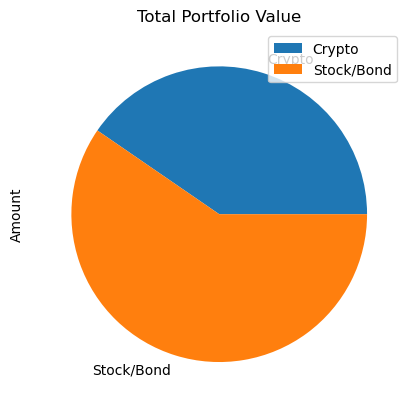

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='Amount', title='Total Portfolio Value')

#### Step 4: Determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. This is done by implementing the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (Set earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. 


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000.

In [26]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. 

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print('Congratulations! You have enough money in this fund')
elif total_portfolio == emergency_fund_value:
    print("Congratulations on reaching this important financial goal! This portfolio is equal to the emergency fund value!")  
elif total_portfolio < emergency_fund_value:
    print(f"This portfolio is ${emergency_fund_value - total_portfolio} away from reaching the emergency fund value goal")



Congratulations! You have enough money in this fund


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

This section uses the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. This is done by completing the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results. The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, the image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, the image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 3 years back from your current date
start = pd.Timestamp("2019-07-19", tz="America/New_York").isoformat()

end = pd.Timestamp("2022-07-19", tz="America/New_York").isoformat()

In [29]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1  
# The start and end dates should be updated with the information set above
# Add the df property to the end of the call so the response is returned as a DataFrame
historical_closing_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start,
    end = end
).df

# Reorganize the DataFrame
# Separate ticker data
spy_year = historical_closing_df[historical_closing_df['symbol']=='SPY'].drop('symbol', axis=1)
agg_year = historical_closing_df[historical_closing_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
historical_closing_df = pd.concat([spy_year, agg_year],axis=1, keys=['SPY','AGG'])

# Drop the time component of the date
historical_closing_df.index = historical_closing_df.index.date

# Display both the first and last five rows of the DataFrame
historical_closing_df


SPY                                                   \
              open      high      low   close    volume trade_count   
2019-07-19  300.04  300.0700  296.960  297.26  76794138      260715   
2019-07-22  297.61  298.5000  297.040  297.81  45137404      186383   
2019-07-23  299.15  300.0300  298.220  299.98  44935473      208847   
2019-07-24  299.19  301.4400  299.090  301.40  47738870      204882   
2019-07-25  300.94  301.0000  299.110  299.97  55864213      266901   
...            ...       ...      ...     ...       ...         ...   
2022-07-13  375.10  381.9200  374.658  378.83  83568542      671951   
2022-07-14  373.61  379.0498  371.040  377.91  89124659      637413   
2022-07-15  382.55  385.2500  380.540  385.13  78742871      488111   
2022-07-18  388.38  389.0900  380.660  381.95  62864897      489551   
2022-07-19  386.08  392.8700  385.400  392.27  78159593      533269   

                           AGG                                      \
                  vwap    open     high       low   close   volume   
2019-07-19  298.617649  111.22  111.286  111.1400  111.17  3150774   
2019-07-22  297.748117  111.41  111.410  111.3000  111.31  2855073   
2019-07-23  299.177015  111.27  111.320  111.1600  111.20  2659305   
2019-07-24  300.570907  111.33  111.410  111.2950  111.36  2783461   
2019-07-25  300.079179  111.33  111.330  111.0474  111.19  2977486   
...                ...     ...      ...       ...     ...      ...   
2022-07-13  378.823334  101.23  102.240  101.1900  102.21  6514168   
2022-07-14  375.583757  101.51  101.980  101.3300  101.85  6224496   
2022-07-15  383.323926  101.94  102.350  101.9000  102.25  8440151   
2022-07-18  385.089006  102.00  102.030  101.7200  101.92  4948342   
2022-07-19  389.362454  101.95  101.990  101.6615  101.78  4240241   

                                    
           trade_count        vwap  
2019-07-19        9948  111.225017  
2019-07-22        7937  111.344721  
2019-07-23       10894  111.219201  
2019-07-24       12750  111.337833  
2019-07-25       11325  111.190464  
...                ...         ...  
2022-07-13       26715  101.977476  
2022-07-14       24722  101.747120  
2022-07-15       27300  102.214854  
2022-07-18       18801  101.892819  
2022-07-19       18208  101.821971  

[756 rows x 14 columns]

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# Create a simulation object
thirty_year_simulation = MCSimulation(
    portfolio_data=historical_closing_df,
    weights=[0.6, 0.4],
    num_simulation=500,
    num_trading_days=252*30,
)


# Review the simulation input data
thirty_year_simulation.portfolio_data.head()

SPY                                                            \
              open    high     low   close    volume trade_count        vwap   
2019-07-19  300.04  300.07  296.96  297.26  76794138      260715  298.617649   
2019-07-22  297.61  298.50  297.04  297.81  45137404      186383  297.748117   
2019-07-23  299.15  300.03  298.22  299.98  44935473      208847  299.177015   
2019-07-24  299.19  301.44  299.09  301.40  47738870      204882  300.570907   
2019-07-25  300.94  301.00  299.11  299.97  55864213      266901  300.079179   

                            AGG                                      \
           daily_return    open     high       low   close   volume   
2019-07-19          NaN  111.22  111.286  111.1400  111.17  3150774   
2019-07-22     0.001850  111.41  111.410  111.3000  111.31  2855073   
2019-07-23     0.007287  111.27  111.320  111.1600  111.20  2659305   
2019-07-24     0.004734  111.33  111.410  111.2950  111.36  2783461   
2019-07-25    -0.004745  111.33  111.330  111.0474  111.19  2977486   

                                                 
           trade_count        vwap daily_return  
2019-07-19        9948  111.225017          NaN  
2019-07-22        7937  111.344721     0.001259  
2019-07-23       10894  111.219201    -0.000988  
2019-07-24       12750  111.337833     0.001439  
2019-07-25       11325  111.190464    -0.001527

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
thirty_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/colefrederick/Desktop/Folders/Coding/Bootcamp/Challenge/Module_5_Challenge/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011039,0.986931,0.988960,1.016302,1.003599,0.999499,0.977315,0.989933,1.006497,0.992761,...,0.980855,0.998904,1.004497,1.008484,1.005141,0.993981,0.993182,1.005830,1.016466,1.011892
2,1.003159,0.982084,0.999906,1.033300,1.007617,1.004724,0.979476,0.986908,0.989653,0.998973,...,1.003193,0.998814,1.022040,1.011059,1.000109,1.003287,0.996053,1.009511,1.013303,1.004521
3,1.015230,0.980666,1.005506,1.038653,1.009439,1.011208,0.987906,0.999041,0.991266,1.013293,...,0.996143,0.989890,1.009378,1.006712,0.996497,1.004326,0.991069,1.008107,1.022078,1.001421
4,1.009338,0.990901,1.007691,1.028061,1.014318,0.999634,0.977982,1.015431,0.991314,1.009719,...,0.992286,1.013133,0.993111,1.020135,0.996813,1.013081,0.987755,1.004955,1.023837,0.987195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.295820,4.871784,1.216886,11.497400,5.529541,13.307362,15.566092,7.843204,11.234155,2.772035,...,11.932184,4.236491,3.094058,7.171279,4.002143,7.684547,7.958398,4.607360,9.114155,16.637421
7557,1.301182,4.842243,1.216874,11.679466,5.516538,13.405694,15.390326,7.773767,11.090049,2.756415,...,12.021976,4.249173,3.119199,7.269572,3.964429,7.739804,8.004233,4.641725,9.194005,16.468228
7558,1.300318,4.789320,1.225013,11.553329,5.556230,13.417379,15.354123,7.702551,11.103299,2.819026,...,12.141417,4.252288,3.115525,7.273218,3.900043,7.815065,8.048166,4.627316,9.202232,16.570224
7559,1.283271,4.829188,1.225183,11.300495,5.642449,13.575678,15.378593,7.669239,11.151366,2.819520,...,12.067177,4.325232,3.087679,7.362159,3.908994,7.755585,8.148947,4.661487,9.090519,16.194642


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

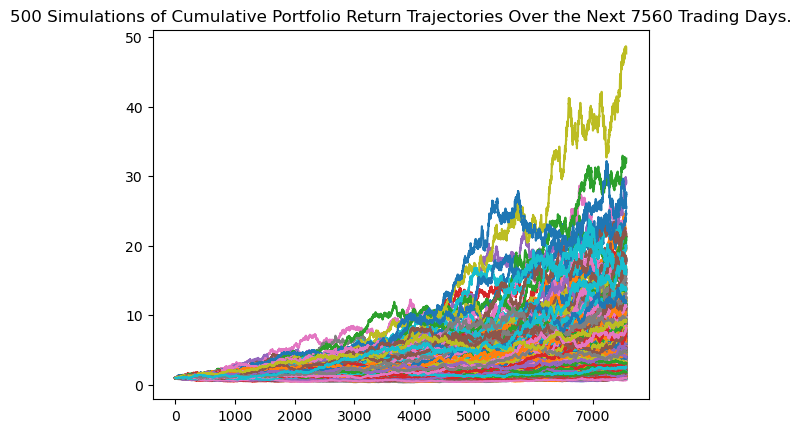

In [32]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
thirty_year_simulation.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

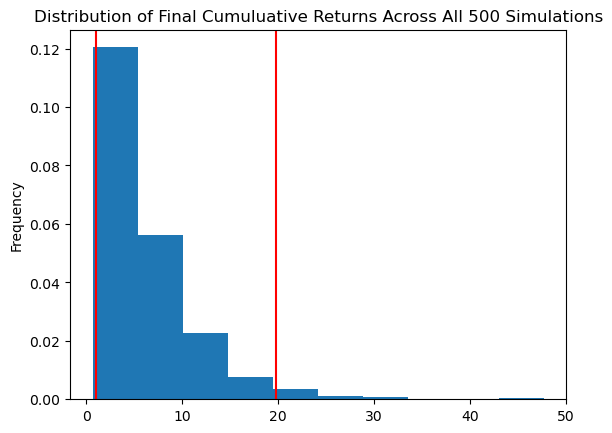

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
thirty_year_simulation.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
thirty_year_simulation_statistics = thirty_year_simulation.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
thirty_year_simulation_statistics


count           500.000000
mean              6.260836
std               5.158335
min               0.663980
25%               2.762342
50%               4.683749
75%               8.080971
max              47.657125
95% CI Lower      1.043501
95% CI Upper     19.802303
Name: 7560, dtype: float64

### 30 Year Plan Analysis 

In [35]:
# Print the current balance of the stock and bond portion of the members portfolio
total_stocks_bonds

63505.7

In [36]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(thirty_year_simulation_statistics[8]*total_stocks_bonds,2)
ci_upper_thirty_cumulative_return = round(thirty_year_simulation_statistics[9]*total_stocks_bonds,2)

# Print the result of your calculations
print(f"There is a 95% chance that the current portfolio investment total of {total_stocks_bonds} "
      f" with a weight of 60% stock 40% bond will end within in the range of"
      f" ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return} over the next 30 years.")

There is a 95% chance that the current portfolio investment total of 63505.7  with a weight of 60% stock 40% bond will end within in the range of $66268.24 and $1257559.09 over the next 30 years.


### Forecast Cumulative Returns in 10 Years

The next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

This new Monte Carlo simulation does the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [37]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
ten_year_simulation = MCSimulation(
    portfolio_data=historical_closing_df,
    weights=[0.8, 0.2],
    num_simulation=500,
    num_trading_days=252*10,
)


# Review the simulation input data
ten_year_simulation.portfolio_data.head()


SPY                                                            \
              open    high     low   close    volume trade_count        vwap   
2019-07-19  300.04  300.07  296.96  297.26  76794138      260715  298.617649   
2019-07-22  297.61  298.50  297.04  297.81  45137404      186383  297.748117   
2019-07-23  299.15  300.03  298.22  299.98  44935473      208847  299.177015   
2019-07-24  299.19  301.44  299.09  301.40  47738870      204882  300.570907   
2019-07-25  300.94  301.00  299.11  299.97  55864213      266901  300.079179   

                            AGG                                      \
           daily_return    open     high       low   close   volume   
2019-07-19          NaN  111.22  111.286  111.1400  111.17  3150774   
2019-07-22     0.001850  111.41  111.410  111.3000  111.31  2855073   
2019-07-23     0.007287  111.27  111.320  111.1600  111.20  2659305   
2019-07-24     0.004734  111.33  111.410  111.2950  111.36  2783461   
2019-07-25    -0.004745  111.33  111.330  111.0474  111.19  2977486   

                                                 
           trade_count        vwap daily_return  
2019-07-19        9948  111.225017          NaN  
2019-07-22        7937  111.344721     0.001259  
2019-07-23       10894  111.219201    -0.000988  
2019-07-24       12750  111.337833     0.001439  
2019-07-25       11325  111.190464    -0.001527

In [38]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
ten_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/colefrederick/Desktop/Folders/Coding/Bootcamp/Challenge/Module_5_Challenge/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.975488,1.010878,1.004669,1.002117,0.988572,1.004963,1.004157,1.005307,1.008980,0.989456,...,1.030454,1.012894,1.003115,0.996442,0.989380,1.001528,0.998053,1.004857,0.978646,1.002477
2,0.955162,1.030907,1.011471,1.010106,1.007755,0.998871,1.021649,1.011677,1.019928,1.007584,...,1.018650,1.027262,1.012649,0.997202,0.972557,1.005529,0.991426,1.015947,0.982750,1.015333
3,0.948770,1.027831,1.003704,1.002839,1.025275,0.989776,1.028288,1.015913,0.997321,1.009266,...,1.011504,1.026904,1.011518,1.005702,0.972487,0.981186,0.982991,1.027151,0.969921,1.013350
4,0.946572,1.045450,1.002939,0.998430,1.031205,0.962151,1.038372,1.017158,0.984807,1.001378,...,1.027783,1.010700,1.027152,1.022834,0.994529,0.996566,0.998335,1.040148,0.965910,1.018479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.365282,1.858456,1.872638,2.883095,2.662049,1.882924,0.732791,2.687171,1.927886,3.365098,...,1.681122,1.741344,0.809451,2.511892,3.612593,1.938741,6.494000,2.808237,1.686692,2.628204
2517,3.410464,1.832934,1.908538,2.815196,2.583933,1.887353,0.741912,2.681792,1.950055,3.369607,...,1.656739,1.726648,0.806193,2.503843,3.577844,1.956004,6.566934,2.809341,1.667165,2.665568
2518,3.346688,1.788261,1.942076,2.836808,2.619832,1.900500,0.751563,2.730127,1.965267,3.412707,...,1.636979,1.710758,0.797170,2.504216,3.566058,1.984771,6.567522,2.828887,1.682011,2.723533
2519,3.412027,1.809169,1.933641,2.814699,2.614260,1.891620,0.746448,2.702581,1.968100,3.419283,...,1.644975,1.723551,0.796482,2.512745,3.623423,2.005518,6.679612,2.832824,1.675884,2.727216


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

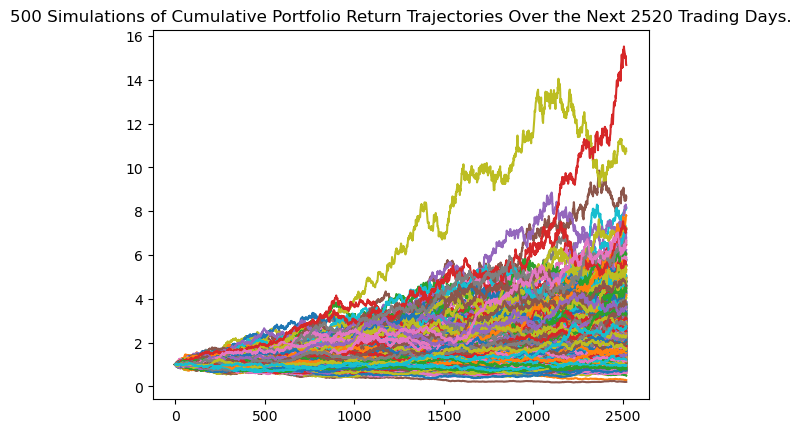

In [39]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
ten_year_simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

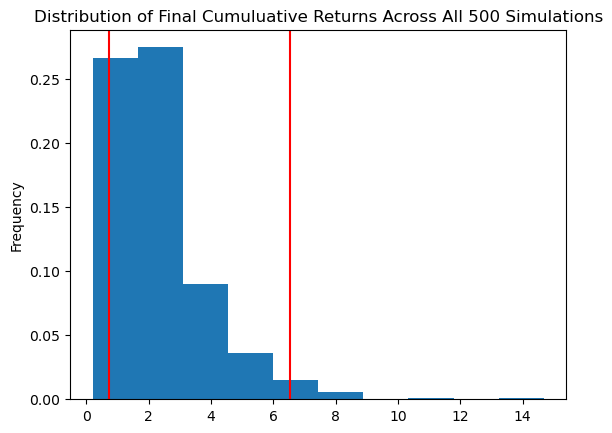

In [40]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
ten_year_simulation.plot_distribution()

In [41]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
ten_year_simulation_statistics = ten_year_simulation.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
ten_year_simulation_statistics


count           500.000000
mean              2.388402
std               1.559298
min               0.205730
25%               1.355844
50%               2.020728
75%               2.952935
max              14.679173
95% CI Lower      0.725322
95% CI Upper      6.523276
Name: 2520, dtype: float64

### 10 Year Plan Analysis

In [42]:
# Print the current balance of the stock and bond portion of the members portfolio
total_stocks_bonds

63505.7

In [43]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(ten_year_simulation_statistics[8]*total_stocks_bonds,2)
ci_upper_ten_cumulative_return = round(ten_year_simulation_statistics[9]*total_stocks_bonds,2)

# Print the result of the calculations
print(f"There is a 95% chance that the current portfolio investment total of {total_stocks_bonds} "
      f" with a weight of 80% stock 20% bond will end within in the range of"
      f" ${ci_lower_ten_cumulative_return} and ${ci_upper_ten_cumulative_return} over the next 10 years.")


There is a 95% chance that the current portfolio investment total of 63505.7  with a weight of 80% stock 20% bond will end within in the range of $46062.11 and $414265.24 over the next 10 years.


In [44]:
# Create df containing summaries of 10 and 30 year Monte Carlo Simulation
monte_summaries_df = pd.concat([
    thirty_year_simulation_statistics, 
    ten_year_simulation_statistics],
    axis=1, 
    keys=['30 Year','10 Year'])

In [45]:
# Create cumulative profit and loss dataframe by multiplying stock values by the Monte Carlo return data
cumulative_pnl = total_stocks_bonds * monte_summaries_df.drop(['count'])

In [46]:
# Format cumulative profit and loss dataframe
cumulative_pnl = cumulative_pnl.style.format("{:,.0f}")

# Display cumulative profit and loss dataframe
cumulative_pnl

,30 Year,10 Year
mean,"397,599","151,677"
std,"327,584","99,024"
min,"42,167","13,065"
25%,"175,424","86,104"
50%,"297,445","128,328"
75%,"513,188","187,528"
max,"3,026,499","932,211"
95% CI Lower,"66,268","46,062"
95% CI Upper,"1,257,559","414,265"
